# Exploratory Data Analysis

At this stage data is analysed to capture relationships between the target variable: Brewing Method, and potential predictors: other variables in the table.
Hence, removing potential outliers. 

1. First data is read from csv file with clean dataset (clean in the previous project) and transformed into a dataframe.
2. Then data is plotted for each of the variables against the target:
    - check if there is no direct relationships between predictor and target
    - spot outliers
    - observe the data distribution

*Note:* Some of the variables from the original dataset were omitted:
    - price per kg - price does not influence the brewing method, it can be a result of the latter
    - grind - the state of the beans is irrelevant for the target variable
    - variables previously put into higher positioning were also omitted

In [147]:
import pandas as pd # import necessary library

In [179]:
coffee_df = pd.read_csv('data\coffee_desk_dataset_clean.csv', index_col='idx') # read data to data frame
coffee_df

,process_general,origin_region,roast,arabica_percentage,pure_arabica,washed,natural,fermented_traditional,fermented_closed_tank,brewing_method
idx,,,,,,,,,,
0,Monsooning,Asia,light,100,True,False,False,False,False,drip
1,Natural,Latam,medium,100,True,False,True,False,False,drip
2,Natural,Africa,light,100,True,False,True,False,False,drip
3,Washed,Africa,light,100,True,True,False,False,False,drip
4,Natural,Asia,dark,100,True,False,True,False,False,drip
...,...,...,...,...,...,...,...,...,...,...
860,Fermented,Latam,light,100,True,False,False,False,False,drip
861,Natural,Latam,light,30,False,False,True,False,False,espresso
862,Hybrid,Latam,light,100,True,True,True,False,False,drip


## Data plotting: brewing method

### Step 1
I am first plotting the count of tarbet variable to see the distribution of labels.

<AxesSubplot:>

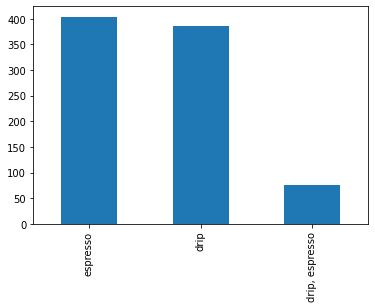

In [149]:
coffee_df['brewing_method'].value_counts().plot(kind='bar')

In [150]:
coffee_df['brewing_method'].value_counts()

espresso          404
drip              386
drip, espresso     75
Name: brewing_method, dtype: int64

### Observation:
Data is visibly evenly distributed among two principal classes.
There is the third class of coffees, which can be used for both brewing with traditioanl espresso style or using more altenative techniques.
Since the principal objective of the client is to be able to buy and offer only the beans which are applicable for the alternative brewing methods (labelled as DRIP), this moxed labels can be changed to DRIP, as in this case they are also good for DRIP but might be cheaper to source, so it would be a missed chance on buiyng cheaper raw materials.

In [180]:
coffee_df['brewing_method_binary'] = coffee_df['brewing_method'].replace({'drip, espresso':'drip'})
coffee_df['brewing_method_binary'].value_counts()

drip        461
espresso    404
Name: brewing_method_binary, dtype: int64

## Data plotting: predictor vs. brewing method

### Step 2
I am plotting some of the variables I already suspect of outliers. I start with the region of origin (knowing that espresso is a popular style in Italy, Europe), hence using expert knowledge to aid with data analysis.

In [152]:
import plotly.express as px
import seaborn as sns

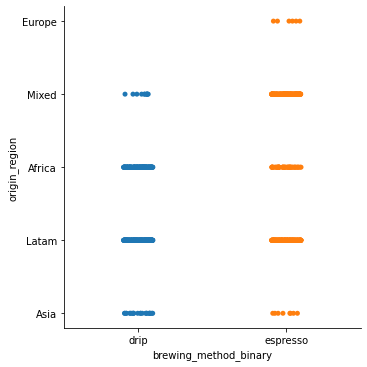

In [153]:
sns.catplot(x='brewing_method_binary', y='origin_region', data=coffee_df, kind="strip")

### Observation:
It is visible that data from Europe is an outlier, given that from this origin only espresso beans proceed. Hence, it would add unnecessary noise to data and it will be removed.

In [181]:
coffee_df = coffee_df[coffee_df["origin_region"] != "Europe"] # removing data with Europe as origin
coffee_df

,process_general,origin_region,roast,arabica_percentage,pure_arabica,washed,natural,fermented_traditional,fermented_closed_tank,brewing_method,brewing_method_binary
idx,,,,,,,,,,,
0,Monsooning,Asia,light,100,True,False,False,False,False,drip,drip
1,Natural,Latam,medium,100,True,False,True,False,False,drip,drip
2,Natural,Africa,light,100,True,False,True,False,False,drip,drip
3,Washed,Africa,light,100,True,True,False,False,False,drip,drip
4,Natural,Asia,dark,100,True,False,True,False,False,drip,drip
...,...,...,...,...,...,...,...,...,...,...,...
860,Fermented,Latam,light,100,True,False,False,False,False,drip,drip
861,Natural,Latam,light,30,False,False,True,False,False,espresso,espresso
862,Hybrid,Latam,light,100,True,True,True,False,False,drip,drip


### Step 3

I also plot process, as I presume some of them to be very specific and hence having direct connection to brewing method.

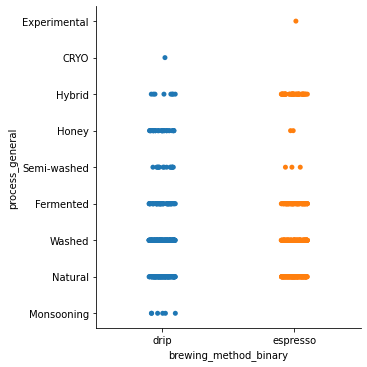

In [155]:
sns.catplot(x='brewing_method_binary', y='process_general', data=coffee_df, kind="strip")

### Observation:
Another variables to be removed are process types: experimental, cryo and monsooning, as they are clearly pointing to one brewing method, hence no machine learning would be needed to correlate them with the target variable, just as in case of Europe before.

In [182]:
coffee_df = coffee_df[coffee_df["process_general"] != "Experimental"] # removing the rows with unwanted process types
coffee_df = coffee_df[coffee_df["process_general"] != "Monsooning"]
coffee_df = coffee_df[coffee_df["process_general"] != "CRYO"]
coffee_df

,process_general,origin_region,roast,arabica_percentage,pure_arabica,washed,natural,fermented_traditional,fermented_closed_tank,brewing_method,brewing_method_binary
idx,,,,,,,,,,,
1,Natural,Latam,medium,100,True,False,True,False,False,drip,drip
2,Natural,Africa,light,100,True,False,True,False,False,drip,drip
3,Washed,Africa,light,100,True,True,False,False,False,drip,drip
4,Natural,Asia,dark,100,True,False,True,False,False,drip,drip
5,Natural,Latam,medium,100,True,False,True,False,False,drip,drip
...,...,...,...,...,...,...,...,...,...,...,...
860,Fermented,Latam,light,100,True,False,False,False,False,drip,drip
861,Natural,Latam,light,30,False,False,True,False,False,espresso,espresso
862,Hybrid,Latam,light,100,True,True,True,False,False,drip,drip


### Step 4

I now proceed to plotting the only numerical variable.

In [157]:
arabica_fig = px.scatter(coffee_df, x='arabica_percentage', y='brewing_method_binary')
arabica_fig.show()

### Observation:
Another observation to be made is the fact that coffees for drip (alternative) brewing are only pure blends, not mixed between Arabica and Robusta. This relationship can be already drawn from Pue arabica flag variable, hence, this variable will be dropped from dataset.

## Plotting categorical variables vs. target variable (brewing method)

### Step 5

Now I can plot data for two classes only, and the distribution against different categorical variables.

In [158]:
categorical_variables = ['process_general', 'origin_region', 'roast', 'pure_arabica', 'washed', 'natural', 'fermented_traditional', 'fermented_closed_tank']

In [159]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

rows = (len(categorical_variables) // 2)
cols = 2
subplot_titles = tuple(cat + " vs brewing method" for cat in categorical_variables)
fig = make_subplots(rows=rows, cols=cols, subplot_titles=subplot_titles)

for i, cat in enumerate(categorical_variables):
    row = (i // cols) + 1
    col = (i % cols) + 1
    
    fig.add_trace(go.Violin(
        x=coffee_df[cat], y=coffee_df["brewing_method_binary"], name=cat, box_visible=False
    ), row=row, col=col)
    
    fig.update_xaxes(patch=dict(type='category', categoryorder='mean ascending'), row=row, col=col)
    
    
fig.update_layout(height=2000, width=1500)
fig.show()

### Observation:
Washed and Natural flags add little information given data distribustion, there is no observable patter, hence these variables might be dropped from dataset. There also seems to be direct relation between the brewing method and roast, as well as brewing method and pure arabica flag, which will be analysed further below.

## Logistic Regression Data Modelling

### Step 6
I will now try to model data using logistic regression from statmodels library with logit function.
Before I can use it, I need to convert my target variable into binary labels. I' setting drip to 1 as the desired class, and espresso as 0.

In [183]:
coffee_df['brewing_method_binary_num'] = coffee_df['brewing_method_binary'].replace({'drip':1, 'espresso':0})
coffee_df['brewing_method_binary_num'].value_counts()

1    454
0    397
Name: brewing_method_binary_num, dtype: int64

### Step 7

I then prepare a string to be passed to the function, to save time typing.

In [191]:
categorical_variables = ['process_general, Treatment(reference="Honey")', 'origin_region', 'roast', 'pure_arabica', 'washed', 'natural', 'fermented_traditional', 'fermented_closed_tank']
categorical_list = ["C({})".format(var) for var in categorical_variables]
categorical_string = " + ".join(categorical_list)
formula_string = "brewing_method_binary_num ~ {}".format(categorical_string)
formula_string

'brewing_method_binary_num ~ C(process_general, Treatment(reference="Honey")) + C(origin_region) + C(roast) + C(pure_arabica) + C(washed) + C(natural) + C(fermented_traditional) + C(fermented_closed_tank)'

In [192]:
import statsmodels.formula.api as smf

baseline_model = smf.logit(formula_string, coffee_df).fit()
baseline_model.summary()

         Current function value: 0.163572
         Iterations: 35
C:\Users\Lucyna\miniconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                              
=====================================================================================
Dep. Variable:     brewing_method_binary_num   No. Observations:                  851
Model:                                 Logit   Df Residuals:                      835
Method:                                  MLE   Df Model:                           15
Date:                       Sat, 12 Jun 2021   Pseudo R-squ.:                  0.7632
Time:                               19:51:44   Log-Likelihood:                -139.20
converged:                             False   LL-Null:                       -587.96
Covariance Type:                   nonrobust   LLR p-value:                1.200e-181
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                         -76.9741   8.23e+06  -9.35e-06      1.000   -1.61e+07    1.61e+07
C(process_general, Treatment(reference="Honey"))[T.Fermented]      50.9000   8.23e+06   6.18e-06      1.000   -1.61e+07    1.61e+07
C(process_general, Treatment(reference="Honey"))[T.Hybrid]          9.5548    775.563      0.012      0.990   -1510.520    1529.630
C(process_general, Treatment(reference="Honey"))[T.Natural]         9.8646    775.564      0.013      0.990   -1510.213    1529.942
C(process_general, Treatment(reference="Honey"))[T.Semi-washed]    37.3372   8.23e+06   4.54e-06      1.000   -1.61e+07    1.61e+07
C(process_general, Treatment(reference="Honey"))[T.Washed]         49.9119   8.23e+06   6.06e-06      1.000   -1.61e+07    1.61e+07
C(origin_region)[T.Asia]                                            2.5313      1.430      1.770      0.077      -0.271       5.334
C(origin_region)[T.Latam]                                          -0.7093      0.368     -1.928      0.054      -1.430       0.012
C(origin_region)[T.Mixed]                                          -1.8486      0.634     -2.914      0.004      -3.092      -0.605
C(roast)[T.light]                                                  27.7829   1336.615      0.021      0.983   -2591.934    2647.500
C(roast)[T.medium]                                                  2.7539      0.729      3.779      0.000       1.326       4.182
C(pure_arabica)[T.True]                                            24.2915   1336.615      0.018      0.986   -2595.426    2644.009
C(washed)[T.True]                                                  -0.5753      1.581     -0.364      0.716      -3.675       2.524
C(natural)[T.True]                                                 39.7773   8.23e+06   4.83e-06      1.000   -1.61e+07    1.61e+07
C(fermented_traditional)[T.True]                                   13.0546    775.562      0.017      0.987   -1507.018    1533.128
C(fermented_closed_tank)[T.True]                                    0.4311      1.355      0.318      0.750      -2.224       3.086
===================================================================================================================================

Possibly complete quasi-separation: A fraction 0.58 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Observations:
From the warning (below the model details) we see that there are variables which can directly point to the target variable, hence making predictions redundan  Albert and Anderson (1984) define this as, “there is a vector α that correctly allocates all observations to their group.”
* Analysing p-values, I come to a conclution that I should drop the following variable values:
    * process_general - Honey
    * process_general - Hybrid
    * process_general - Natural
    * natural - True
* And possibly drop also the ones with p-value close to 1:
    * process_general - Semi-washed
    * roast - light
    * pure_arabica - True
    * fermented_traditional - True 

I will begin by omitting process_general, which seems to have genarated the most issues.

### Step 8

I continue with backward stepwise selection.

In [193]:
categorical_variables = ['origin_region', 'roast', 'pure_arabica', 'washed', 'natural', 'fermented_traditional', 'fermented_closed_tank']
categorical_list = ["C({})".format(var) for var in categorical_variables]
categorical_string = " + ".join(categorical_list)
formula_string_2 = "brewing_method_binary_num ~ {}".format(categorical_string)
formula_string_2

'brewing_method_binary_num ~ C(origin_region) + C(roast) + C(pure_arabica) + C(washed) + C(natural) + C(fermented_traditional) + C(fermented_closed_tank)'

In [194]:
import statsmodels.formula.api as smf

baseline_model_2 = smf.logit(formula_string_2, coffee_df).fit()
baseline_model_2.summary()

Optimization terminated successfully.
         Current function value: 0.165840
         Iterations 34


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                              
=====================================================================================
Dep. Variable:     brewing_method_binary_num   No. Observations:                  851
Model:                                 Logit   Df Residuals:                      840
Method:                                  MLE   Df Model:                           10
Date:                       Sat, 12 Jun 2021   Pseudo R-squ.:                  0.7600
Time:                               19:53:51   Log-Likelihood:                -141.13
converged:                              True   LL-Null:                       -587.96
Covariance Type:                   nonrobust   LLR p-value:                1.477e-185
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         -118.1451   3.01e+07  -3.93e-06      1.000   -5.89e+07    5.89e+07
C(origin_region)[T.Asia]             2.4016      1.482      1.621      0.105      -0.503       5.306
C(origin_region)[T.Latam]           -0.7339      0.366     -2.006      0.045      -1.451      -0.017
C(origin_region)[T.Mixed]           -1.8355      0.619     -2.965      0.003      -3.049      -0.622
C(roast)[T.light]                  119.6700   3.01e+07   3.98e-06      1.000   -5.89e+07    5.89e+07
C(roast)[T.medium]                   2.9842      0.716      4.168      0.000       1.581       4.387
C(pure_arabica)[T.True]            115.7711   3.01e+07   3.85e-06      1.000   -5.89e+07    5.89e+07
C(washed)[T.True]                   -1.1532      0.445     -2.593      0.010      -2.025      -0.281
C(natural)[T.True]                  -0.8017      0.441     -1.817      0.069      -1.666       0.063
C(fermented_traditional)[T.True]     3.0686      0.856      3.584      0.000       1.390       4.747
C(fermented_closed_tank)[T.True]     1.4821      0.775      1.913      0.056      -0.036       3.000
====================================================================================================

Possibly complete quasi-separation: A fraction 0.57 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

I will also remove roast and pure arabica, which seem directly pointing to the brewing method.

In [196]:
categorical_variables = ['origin_region', 'washed', 'natural', 'fermented_traditional', 'fermented_closed_tank']
categorical_list = ["C({})".format(var) for var in categorical_variables]
categorical_string = " + ".join(categorical_list)
formula_string_3 = "brewing_method_binary_num ~ {}".format(categorical_string)
formula_string_3

'brewing_method_binary_num ~ C(origin_region) + C(washed) + C(natural) + C(fermented_traditional) + C(fermented_closed_tank)'

In [197]:
import statsmodels.formula.api as smf

baseline_model_3 = smf.logit(formula_string_3, coffee_df).fit()
baseline_model_3.summary()

Optimization terminated successfully.
         Current function value: 0.528859
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                              
=====================================================================================
Dep. Variable:     brewing_method_binary_num   No. Observations:                  851
Model:                                 Logit   Df Residuals:                      843
Method:                                  MLE   Df Model:                            7
Date:                       Sat, 12 Jun 2021   Pseudo R-squ.:                  0.2345
Time:                               19:55:14   Log-Likelihood:                -450.06
converged:                              True   LL-Null:                       -587.96
Covariance Type:                   nonrobust   LLR p-value:                 8.842e-56
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            1.5738      0.278      5.660      0.000       1.029       2.119
C(origin_region)[T.Asia]            -0.5581      0.481     -1.161      0.246      -1.500       0.384
C(origin_region)[T.Latam]           -1.0128      0.197     -5.129      0.000      -1.400      -0.626
C(origin_region)[T.Mixed]           -4.0992      0.402    -10.189      0.000      -4.888      -3.311
C(washed)[T.True]                   -0.1326      0.245     -0.541      0.588      -0.613       0.348
C(natural)[T.True]                  -0.8364      0.247     -3.381      0.001      -1.321      -0.352
C(fermented_traditional)[T.True]     2.4888      0.504      4.940      0.000       1.501       3.476
C(fermented_closed_tank)[T.True]     0.6636      0.357      1.858      0.063      -0.036       1.364
====================================================================================================
"""

### Step 9

I will finally omit the Washed flag, which still has higher p-value.

In [200]:
categorical_variables = ['origin_region', 'natural', 'fermented_traditional', 'fermented_closed_tank']
categorical_list = ["C({})".format(var) for var in categorical_variables]
categorical_string = " + ".join(categorical_list)
formula_string_4 = "brewing_method_binary_num ~ {}".format(categorical_string)
formula_string_4

'brewing_method_binary_num ~ C(origin_region) + C(natural) + C(fermented_traditional) + C(fermented_closed_tank)'

In [201]:
import statsmodels.formula.api as smf

baseline_model_4 = smf.logit(formula_string_4, coffee_df).fit()
baseline_model_4.summary()

Optimization terminated successfully.
         Current function value: 0.529032
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                              
=====================================================================================
Dep. Variable:     brewing_method_binary_num   No. Observations:                  851
Model:                                 Logit   Df Residuals:                      844
Method:                                  MLE   Df Model:                            6
Date:                       Sat, 12 Jun 2021   Pseudo R-squ.:                  0.2343
Time:                               19:58:52   Log-Likelihood:                -450.21
converged:                              True   LL-Null:                       -587.96
Covariance Type:                   nonrobust   LLR p-value:                 1.441e-56
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            1.4623      0.186      7.867      0.000       1.098       1.827
C(origin_region)[T.Asia]            -0.5676      0.480     -1.183      0.237      -1.508       0.373
C(origin_region)[T.Latam]           -1.0131      0.198     -5.129      0.000      -1.400      -0.626
C(origin_region)[T.Mixed]           -4.1411      0.397    -10.438      0.000      -4.919      -3.364
C(natural)[T.True]                  -0.7386      0.168     -4.396      0.000      -1.068      -0.409
C(fermented_traditional)[T.True]     2.4112      0.481      5.009      0.000       1.468       3.355
C(fermented_closed_tank)[T.True]     0.7090      0.346      2.048      0.041       0.030       1.388
====================================================================================================
"""

### Step 10

After the initial data modelling I have decided to keep the variables: 'origin_region', 'natural', 'fermented_traditional', 'fermented_closed_tank', with lowest p-values.
Nevertheless, this *backward stepwise selection* is only an attempt at getting the appropriate, statistically significant variables. And I might still need to go back and change the variables I have selected for final model.

### Step 11

Save analysed and cleaned data to a new file.

In [202]:
coffee_df.to_csv('data\coffee_desk_dataset_ead.csv')